In [8]:
from GoogleNews import GoogleNews
from transformers import pipeline
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
#from datasets import load_dataset, Dataset
from transformers import BertTokenizerFast, BertForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
import torch

In [9]:
# 1. Initialize Google News search
googlenews = GoogleNews(lang='en', region='US', period='1d')
googlenews.search('stock market')

HTTP Error 429: Too Many Requests


In [7]:
# 2. Get headlines
# Fetch multiple pages manually
for page in range(1, 10):  # Fetch pages 1 to 3
    googlenews.getpage(page)

# news = googlenews.getall()

headlines = [item['title'] for item in googlenews.result() if item['title']]

headlines

HTTP Error 429: Too Many Requests
HTTP Error 429: Too Many Requests
HTTP Error 429: Too Many Requests
HTTP Error 429: Too Many Requests
HTTP Error 429: Too Many Requests
HTTP Error 429: Too Many Requests
HTTP Error 429: Too Many Requests
HTTP Error 429: Too Many Requests


KeyboardInterrupt: 

In [31]:
# 3. Load deep learning sentiment model
sentiment_pipeline = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")


Device set to use cpu


In [32]:
# 4. Analyze sentiment
results = []
for headline in headlines:
    sentiment = sentiment_pipeline(headline)[0]
    results.append({
        'Headline': headline,
        'Sentiment': sentiment['label'],
        'Score': sentiment['score'],
        'Timestamp': datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    })

In [33]:
# 5. Convert to DataFrame
df = pd.DataFrame(results)


In [34]:
# 6. Compute signal logic
pos_scores = df[df['Sentiment'] == 'POSITIVE']['Score']
neg_scores = df[df['Sentiment'] == 'NEGATIVE']['Score']

avg_pos = pos_scores.mean() if not pos_scores.empty else 0
avg_neg = neg_scores.mean() if not neg_scores.empty else 0

In [35]:
df

,Headline,Sentiment,Score,Timestamp
0,Sensex Today | Stock Market LIVE Updates: GIFT...,POSITIVE,0.998890,2025-06-03 19:29:48
1,Stock Market LIVE Updates: GIFT Nifty suggests...,POSITIVE,0.992887,2025-06-03 19:29:48
2,Rebound Anticipated For Thai Stock Market,POSITIVE,0.996068,2025-06-03 19:29:48
3,"Nifty 50, Sensex today: What to expect from In...",POSITIVE,0.885780,2025-06-03 19:29:48
4,Stock Market Live: GIFT Nifty Implies Higher O...,POSITIVE,0.975416,2025-06-03 19:29:48
5,Scoda Tubes IPO shares to make stock market de...,POSITIVE,0.613723,2025-06-03 19:29:48
6,Buy or sell: Vaishali Parekh recommends three ...,POSITIVE,0.958205,2025-06-03 19:29:48
7,Sensex Today | Stock Market LIVE Updates: GIFT...,POSITIVE,0.999004,2025-06-03 19:29:48
8,Indian stock market: 8 key things that changed...,POSITIVE,0.959098,2025-06-03 19:29:48
9,Asian Stock Futures Buoyed by US Jobs Surprise...,POSITIVE,0.984625,2025-06-03 19:29:48


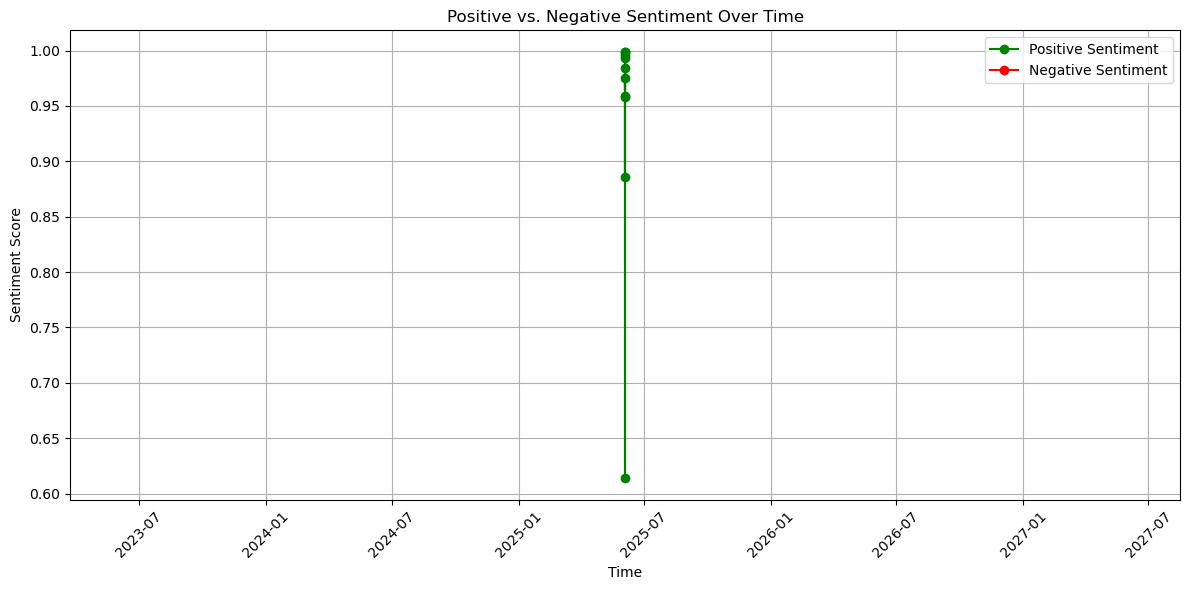

In [36]:
# Ensure Timestamp is in datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Separate data
positive_df = df[df['Sentiment'] == 'POSITIVE']
negative_df = df[df['Sentiment'] == 'NEGATIVE']

# Plot setup
plt.figure(figsize=(12, 6))

# Plot sentiment scores over time
plt.plot(positive_df['Timestamp'], positive_df['Score'], 'go-', label='Positive Sentiment')
plt.plot(negative_df['Timestamp'], negative_df['Score'], 'ro-', label='Negative Sentiment')

# Labels and formatting
plt.xlabel('Time')
plt.ylabel('Sentiment Score')
plt.title('Positive vs. Negative Sentiment Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()

In [37]:
# 7. Trading signal logic
if avg_pos > 0.85 and len(pos_scores) > len(neg_scores):
    signal = "BUY"
elif avg_neg > 0.85 and len(neg_scores) > len(pos_scores):
    signal = "SELL"
else:
    signal = "HOLD"

In [38]:
# 8. Output results
df[['Timestamp', 'Headline', 'Sentiment', 'Score']]


,Timestamp,Headline,Sentiment,Score
0,2025-06-03 19:29:48,Sensex Today | Stock Market LIVE Updates: GIFT...,POSITIVE,0.998890
1,2025-06-03 19:29:48,Stock Market LIVE Updates: GIFT Nifty suggests...,POSITIVE,0.992887
2,2025-06-03 19:29:48,Rebound Anticipated For Thai Stock Market,POSITIVE,0.996068
3,2025-06-03 19:29:48,"Nifty 50, Sensex today: What to expect from In...",POSITIVE,0.885780
4,2025-06-03 19:29:48,Stock Market Live: GIFT Nifty Implies Higher O...,POSITIVE,0.975416
5,2025-06-03 19:29:48,Scoda Tubes IPO shares to make stock market de...,POSITIVE,0.613723
6,2025-06-03 19:29:48,Buy or sell: Vaishali Parekh recommends three ...,POSITIVE,0.958205
7,2025-06-03 19:29:48,Sensex Today | Stock Market LIVE Updates: GIFT...,POSITIVE,0.999004
8,2025-06-03 19:29:48,Indian stock market: 8 key things that changed...,POSITIVE,0.959098
9,2025-06-03 19:29:48,Asian Stock Futures Buoyed by US Jobs Surprise...,POSITIVE,0.984625


In [39]:
print(f"\n🟢 Trading Signal: {signal}")
print(f"📈 Avg POSITIVE Score: {avg_pos:.2f}")
print(f"📉 Avg NEGATIVE Score: {avg_neg:.2f}")



🟢 Trading Signal: BUY
📈 Avg POSITIVE Score: 0.94
📉 Avg NEGATIVE Score: 0.00


In [40]:
'''
YOU CAN STOP HERE
'''

'\nYOU CAN STOP HERE\n'

In [41]:
# Map sentiment labels to integers
label_map = {'NEGATIVE': 0, 'POSITIVE': 1}
df['Label'] = df['Sentiment'].map(label_map)
df

,Headline,Sentiment,Score,Timestamp,Label
0,Sensex Today | Stock Market LIVE Updates: GIFT...,POSITIVE,0.998890,2025-06-03 19:29:48,1
1,Stock Market LIVE Updates: GIFT Nifty suggests...,POSITIVE,0.992887,2025-06-03 19:29:48,1
2,Rebound Anticipated For Thai Stock Market,POSITIVE,0.996068,2025-06-03 19:29:48,1
3,"Nifty 50, Sensex today: What to expect from In...",POSITIVE,0.885780,2025-06-03 19:29:48,1
4,Stock Market Live: GIFT Nifty Implies Higher O...,POSITIVE,0.975416,2025-06-03 19:29:48,1
5,Scoda Tubes IPO shares to make stock market de...,POSITIVE,0.613723,2025-06-03 19:29:48,1
6,Buy or sell: Vaishali Parekh recommends three ...,POSITIVE,0.958205,2025-06-03 19:29:48,1
7,Sensex Today | Stock Market LIVE Updates: GIFT...,POSITIVE,0.999004,2025-06-03 19:29:48,1
8,Indian stock market: 8 key things that changed...,POSITIVE,0.959098,2025-06-03 19:29:48,1
9,Asian Stock Futures Buoyed by US Jobs Surprise...,POSITIVE,0.984625,2025-06-03 19:29:48,1


In [42]:
# Split into train/test
train_texts, test_texts, train_labels, test_labels = train_test_split(df['Headline'].tolist(), df['Label'].tolist(), test_size=0.2)

In [43]:
# Tokenizer
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

train_encodings = tokenizer(train_texts, truncation=True, padding=True)
test_encodings = tokenizer(test_texts, truncation=True, padding=True)

In [44]:
# Wrap in PyTorch Dataset
class FinancialDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels
    def __getitem__(self, idx):
        return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()} | {'labels': torch.tensor(self.labels[idx])}
    def __len__(self):
        return len(self.labels)

train_dataset = FinancialDataset(train_encodings, train_labels)
test_dataset = FinancialDataset(test_encodings, test_labels)

In [45]:
# Load model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [46]:
# Training arguments
training_args = TrainingArguments(
    output_dir='./results',
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=4,
    logging_dir='./logs'
)


In [47]:
# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset
)

# Fine-tune
trainer.train()

Step,Training Loss


TrainOutput(global_step=4, training_loss=0.8449001312255859, metrics={'train_runtime': 20.6149, 'train_samples_per_second': 1.552, 'train_steps_per_second': 0.194, 'total_flos': 444003892416.0, 'train_loss': 0.8449001312255859, 'epoch': 4.0})

In [48]:
# Save the fine-tuned model
model.save_pretrained('./custom-financial-sentiment-model')
tokenizer.save_pretrained('./custom-financial-sentiment-model')

('./custom-financial-sentiment-model\\tokenizer_config.json',
 './custom-financial-sentiment-model\\special_tokens_map.json',
 './custom-financial-sentiment-model\\vocab.txt',
 './custom-financial-sentiment-model\\added_tokens.json',
 './custom-financial-sentiment-model\\tokenizer.json')

In [49]:
# Use Fine-Tuned Model for Inference
from transformers import pipeline

sentiment_pipeline = pipeline(
    "text-classification",
    model="./custom-financial-sentiment-model",
    tokenizer="./custom-financial-sentiment-model"
)

result = sentiment_pipeline("S&P 500 rallies as inflation eases")
print(result)

Device set to use cpu


[{'label': 'LABEL_1', 'score': 0.518094003200531}]
